# Bagian MFCC adalah membandingkan antara pakai teknik MFCC saja dan dengan penambahan fungsi Delta-Delta

# MFCC With Delta untuk 26 feature, dengan 13 dari MFCC dan 13 dari Delta, fitur dapat di update hingga 40 dengan 20 MFCC dan 20 Delta, jadi dapat meningkatkan akurasi, hanya saja komputasi juga akan lebih berat dan lama.

Link: http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

Link all audio dapat di download disini https://github.com/Wayan123/data-rekaman

# Install library MFCC

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=563d36750dc9325a85c7194d2295201ec196f80381799b994be8856c84b40f53
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


# Import Library yang dibutuhkan

In [ ]:
from python_speech_features import mfcc   # Import library MFCC
from python_speech_features import delta  # Memanggil fungsi delta 
from python_speech_features import logfbank # menggail fungsi log filter bank
import scipy.io.wavfile as wav # library untuk menanangi file dengan format .wav

Download Audio : https://s.id/14aLR

## Load file wav dari lokal komputer

In [ ]:
path_file = "sample_data/Halo.wav"


## Memutar audio yang di upload dengan menggunakan library Ipython 

In [ ]:
import IPython.display as ipd
ipd.Audio(path_file)

ValueError: ignored

## Melakukan tahap preprocessing pada audio menggunakan MFCC

In [ ]:
(rate,sig) = wav.read(path_file)
mfcc_feat = mfcc(sig,rate)
d_mfcc_feat = delta(mfcc_feat, 2)
fbank_feat = logfbank(sig,rate)

Info lebih lengkap mengenai masing-masing fungsi pada MFCC dapat dibaca di documentation berikut:
1. https://python-speech-features.readthedocs.io/en/latest/
2. https://github.com/jameslyons/python_speech_features (github)
3. http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/ (tutorial)

## Menampilkan hasil ekstraksi ciri menggunakan MFCC + Fungsi Delta dengan masing2 13 feature, jadi total 26 feature.

In [ ]:
print(fbank_feat[1:3,:])

[[ 5.40952327  5.27503219  4.61333235  4.46917528  5.08064042  5.54209255
   6.96869708  6.52222032  6.3474741   6.45383921  6.78291667  7.65121519
   7.79514893  7.90644753  8.17890722  8.14861938  8.66860063  9.05679499
   9.59584769  9.82626979  9.65613824  9.31135215 10.1501742  10.06158924
   9.82894678  8.70877909]
 [ 4.73190247  4.21947252  4.01578997  6.38507855  5.76995235  5.25681018
   6.46441852  6.50544449  5.00246869  6.00249104  6.58012247  7.54585581
   7.38493879  7.39516933  7.9271287   8.33663864  9.20267154  9.22956928
   9.5512093   9.9379602   9.97827575  9.56729665 10.33923171 10.29897038
  10.02765118  9.07267703]]


In [ ]:
fbank_feat

array([[ 5.05837454,  4.69945829,  5.01019657, ..., 10.06784406,
         9.72281492,  9.00306898],
       [ 5.40952327,  5.27503219,  4.61333235, ..., 10.06158924,
         9.82894678,  8.70877909],
       [ 4.73190247,  4.21947252,  4.01578997, ..., 10.29897038,
        10.02765118,  9.07267703],
       ...,
       [ 3.1948645 ,  4.9930906 ,  3.30831947, ..., 10.47552141,
         9.93594575,  9.13274544],
       [ 3.10406004,  4.37634903,  5.70884036, ..., 10.45365173,
        10.08580607,  9.18109233],
       [ 4.75630047,  5.7601739 ,  4.48774333, ..., 10.23654937,
         9.95028475,  8.74067339]])

Tampilkan total baris feature 

In [ ]:
data = len(fbank_feat)
data

295

Menyimpan file hasil ekstraksi ke format csv menggunakan library pandas

In [ ]:
import pandas as pd 
   
df = pd.DataFrame(fbank_feat)
# saving the dataframe
df.to_csv('extract_delta_halo.csv')

In [ ]:
# Kita juga dapat menampilkan format yang telah disimpan disini

df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,5.058375,4.699458,5.010197,5.992782,4.898797,5.920567,6.133607,5.423469,5.640070,6.195339,...,9.238493,8.618699,9.260594,9.515631,9.431563,9.213193,10.296237,10.067844,9.722815,9.003069
1,5.409523,5.275032,4.613332,4.469175,5.080640,5.542093,6.968697,6.522220,6.347474,6.453839,...,8.668601,9.056795,9.595848,9.826270,9.656138,9.311352,10.150174,10.061589,9.828947,8.708779
2,4.731902,4.219473,4.015790,6.385079,5.769952,5.256810,6.464419,6.505444,5.002469,6.002491,...,9.202672,9.229569,9.551209,9.937960,9.978276,9.567297,10.339232,10.298970,10.027651,9.072677
3,4.063131,4.778576,4.202984,5.361942,6.215727,6.389502,6.890122,6.863103,6.706865,6.411253,...,8.596453,8.908127,9.745715,9.930851,9.708902,9.184525,10.018841,10.290953,9.735346,8.819003
4,5.938922,3.507940,4.491080,4.741340,5.854195,6.847948,6.572518,6.034017,5.584480,6.013451,...,9.465658,8.807762,10.104384,10.286369,9.659482,9.516384,10.241640,10.304194,9.714260,8.901108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,6.511353,4.912915,5.298153,6.484740,6.294715,6.326256,6.436397,5.895657,6.069039,5.990548,...,8.795727,9.490451,9.763177,9.953131,9.884970,9.111148,9.889506,10.073816,9.818110,8.534528
291,1.943519,4.933836,4.639058,6.697561,6.803318,6.971697,7.266438,6.673208,6.361309,7.554131,...,11.074358,12.857489,12.625526,10.593794,10.337841,9.637994,10.519834,12.042386,11.141536,9.639350
292,3.194864,4.993091,3.308319,6.532255,7.100302,7.296372,6.074886,7.261062,6.302201,6.423688,...,9.580522,10.682289,10.240466,9.863538,9.852628,9.595721,10.435929,10.475521,9.935946,9.132745
293,3.104060,4.376349,5.708840,6.271228,7.082293,6.462383,6.668962,5.406098,6.231374,6.487364,...,8.871996,9.332873,9.717141,10.094600,9.942559,9.600524,10.509622,10.453652,10.085806,9.181092


# MFCC Pembahasan Lengkap Tanpa Fungsi Delta dan Double Delta

Link: 
1. https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
2. https://python-speech-features.readthedocs.io/en/latest/
3. https://www.programcreek.com/python/example/105369/python_speech_features.delta
4. https://github.com/jameslyons/python_speech_features/blob/master/docs/source/index.rst
5. https://github.com/jameslyons/python_speech_features

In [ ]:
import librosa
audio_path = 'sample_data/Halo.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


Menentukan Sample Rate 44,1 KHz

In [ ]:
librosa.load(audio_path, sr=44100)

(array([ 0.00073242,  0.00115967,  0.00021362, ..., -0.00392151,
        -0.00299072, -0.00282288], dtype=float32), 44100)

Jika Sample Rate tidak ditentukan, maka default 48 KHz

In [ ]:
librosa.load(audio_path, sr=None)

(array([ 0.00073242,  0.00115967,  0.00021362, ..., -0.00392151,
        -0.00299072, -0.00282288], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

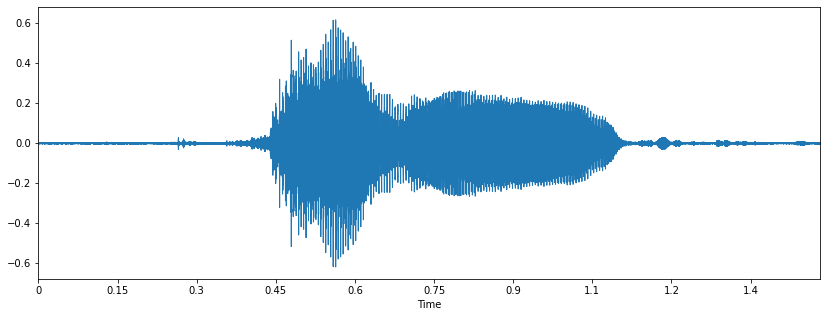

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

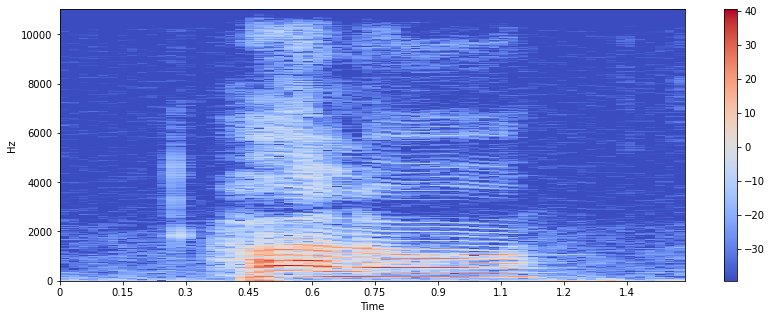

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

32654 22050


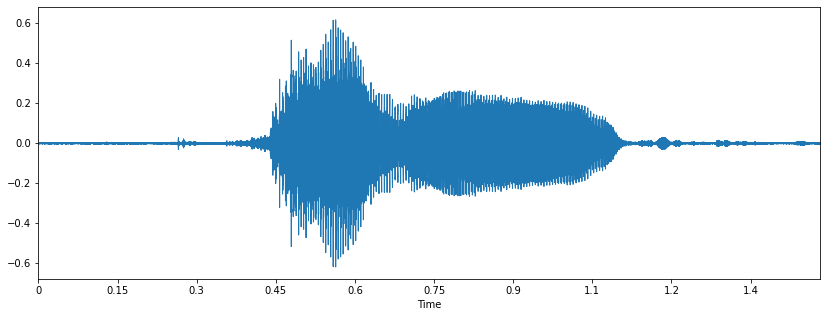

In [ ]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
print(len(x), sr)

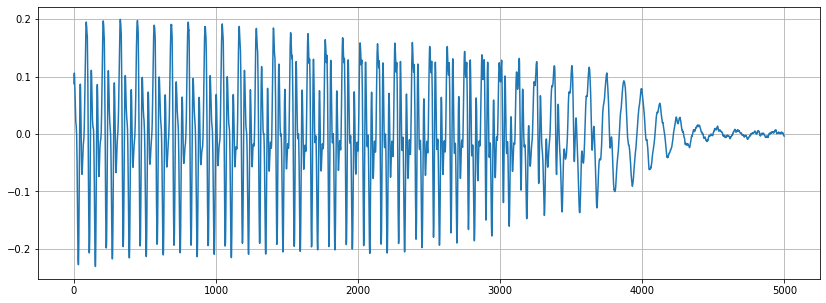

In [ ]:
# Zooming in
n0 = 20000
n1 = 25000
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

217


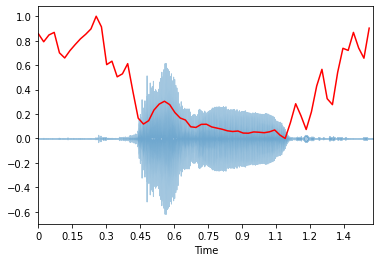

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

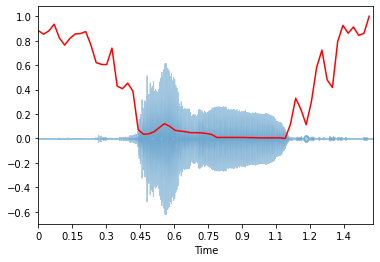

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 64)


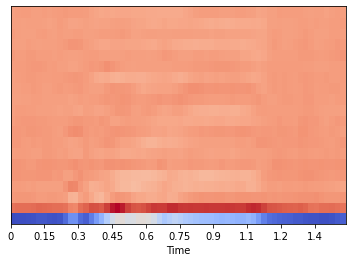

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs

array([[-5.0315253e+02, -4.9787939e+02, -4.9794507e+02, ...,
        -4.9004770e+02, -4.7978613e+02, -4.7327328e+02],
       [ 7.2162048e+01,  7.5382820e+01,  7.6509857e+01, ...,
         8.0147049e+01,  7.3160538e+01,  6.8440147e+01],
       [ 1.3544466e+01,  1.3880648e+01,  1.5899407e+01, ...,
         1.3810560e+01,  1.4715351e+01,  1.7408829e+01],
       ...,
       [ 6.5406313e+00,  2.4719026e+00, -1.5771437e-01, ...,
         3.7037196e+00,  5.2567606e+00,  1.2371291e+00],
       [ 1.1237520e+00,  1.3901553e+00, -6.5384448e-01, ...,
         3.3144875e+00,  5.5211215e+00,  5.6248889e+00],
       [-4.7494638e-01,  4.8697081e+00,  8.0938244e+00, ...,
         2.0077806e+00,  3.9224279e+00,  2.0302701e+00]], dtype=float32)

In [ ]:
import pandas as pd 
   
df1 = pd.DataFrame(mfccs)
# saving the dataframe
df.to_csv('extract_delta_hai.csv')

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-503.152527,-497.879395,-497.945068,-497.636047,-494.610626,-485.307343,-484.420197,-491.359375,-494.640472,-487.897797,...,-479.590332,-481.388489,-487.759308,-490.474274,-489.954559,-495.765106,-495.144104,-490.047699,-479.786133,-473.273285
1,72.162048,75.382820,76.509857,76.388336,79.782791,86.579582,85.129211,80.946342,76.523743,77.046539,...,92.524696,97.237198,89.268188,71.401093,67.864403,75.785019,77.250397,80.147049,73.160538,68.440147
2,13.544466,13.880648,15.899407,13.797529,12.493934,7.787709,7.464683,10.091931,9.879797,7.647205,...,19.956257,22.639252,22.681406,23.278042,24.712145,20.384655,15.372512,13.810560,14.715351,17.408829
3,7.386250,7.164664,5.022844,2.709078,4.304244,-1.415738,-1.989216,-0.775988,0.131988,-0.358131,...,4.434363,5.986026,9.013178,7.363651,3.742308,4.854443,0.320086,-0.917330,-5.100078,-8.977571
4,18.563145,17.539223,14.381926,14.235611,14.575282,16.329645,18.092358,17.061291,10.867355,12.390950,...,13.744225,19.641819,23.890055,22.952662,17.599085,14.336168,13.236624,9.151365,12.504494,15.384132
5,16.744637,17.349993,13.878681,10.675375,10.546097,16.478008,19.780523,19.552750,16.440245,14.314434,...,14.981129,18.926363,21.134081,18.961212,18.609688,19.386959,17.297649,16.810955,20.901878,21.060150
6,4.465758,6.256208,6.719798,3.959471,1.893789,2.527892,9.867083,10.621878,5.773756,2.402351,...,5.070318,8.879078,9.442462,6.565424,3.130252,6.981712,8.339755,7.387140,8.390724,4.952566
7,11.731978,11.262927,6.920153,4.828743,8.903177,6.384272,8.496634,8.446632,4.461008,5.559739,...,11.556530,16.688332,14.459324,12.618114,12.071486,9.389007,8.067368,5.345049,10.458162,13.121746
8,12.852430,11.910667,10.737753,13.793661,15.944293,12.307969,10.493258,9.324847,4.944447,1.760508,...,10.923573,19.400036,19.828033,12.865209,10.201161,6.246063,3.214152,8.649300,7.181304,-0.930082
9,4.632877,9.780542,11.547235,11.662590,12.022263,8.638181,8.781700,7.112072,3.008036,3.260153,...,4.720061,14.723152,17.318396,13.203026,12.663473,4.129398,-0.414674,7.394519,12.983763,6.704107


# Speech to Text (STT)



## Install Library SpeechRecognition

In [ ]:
!pip install speechrecognition

     |████████████████████████████████| 32.8 MB 148 kB/s 


## Import modul google speech recognition, library ini hanya bisa bekerja secara online tidak untuk offline.

In [ ]:
import speech_recognition as sr

## Load wav file dari lokal

In [ ]:
path1 = "sample_data/Ilmuan.wav"

## Tes memutar file wav

In [ ]:
import IPython.display as ipd
ipd.Audio(path1)

## Inisialisasi recognizer

In [ ]:
# initialize the recognizer
r = sr.Recognizer()

In [ ]:
# open the file
# Membuka file audio yang di upload
with sr.AudioFile(path1) as source:
    # listen for the data (load audio to memory)
    # Load audio ke memori
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    # konversi audio ke teks dan menggunakan bahasa Indonesia (id), bahasa dapat diganti sesuai dengan kebutuhan
    text = r.recognize_google(audio_data, language='id')
    # Tampilkan isi teks
    print(text) 

Saya ingin menjadi seorang ilmuwan komputer yang hebat di dunia


# Text to Speech (TTS) menggunakan Google TTS

## Install library Google Text to Speech

In [ ]:
!pip install gTTS

## Import modul gTTS

In [ ]:
from gtts import gTTS

## Masukkan kata-kata yang ingin di konversi disini, dan ubah bahasa sesuai dengan kebutuhan, msialnya teks bahasa Indonesia maka set bahasa ke 'id'

In [ ]:
# Masukkan kata-kata yang ingin di konversi disini, dan ubah bahasa sesuai dengan kebutuhan, msialnya teks bahasa Indonesia maka set bahasa ke 'id'
tts = gTTS('Selamat menantikan berbuka puasa ', lang='id')

# Simpan hasil konversi ke format wav file atau bisa juga format mp3
tts.save('idulFitri.wav')

In [ ]:
import IPython.display as ipd
ipd.Audio('idulFitri.wav')